<a href="https://colab.research.google.com/github/keduog/LLM/blob/main/Spirograph1234.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

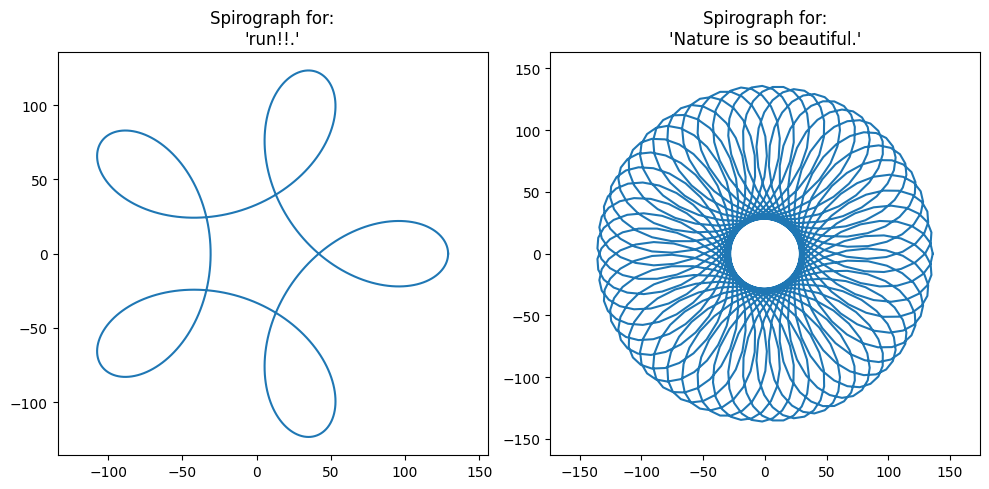

In [6]:

import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

# Load a pre-trained sentence embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define spirograph function
def spirograph(R, r, d, num_points=1000):
    theta = np.linspace(0, 2 * np.pi * r / np.gcd(int(R), int(r)), num_points)
    x = (R - r) * np.cos(theta) + d * np.cos(((R - r) / r) * theta)
    y = (R - r) * np.sin(theta) - d * np.sin(((R - r) / r) * theta)  # Corrected here
    return x, y

# Map sentence embedding to spirograph parameters
def embedding_to_params(embedding):
    normed = np.tanh(embedding[:3])  # compress range to [-1, 1]
    R = 100 + int(50 * normed[0])    # R: large radius
    r = 20 + int(10 * normed[1])     # r: small radius
    d = 50 + int(40 * normed[2])     # d: pen offset
    return R, r, d

# Input sentences
sentence1 = "run!!."
sentence2 = "Nature is so beautiful."

# Generate embeddings
emb1 = model.encode(sentence1)
emb2 = model.encode(sentence2)

# Convert to spirograph parameters
R1, r1, d1 = embedding_to_params(emb1)
R2, r2, d2 = embedding_to_params(emb2)

# Plot both spirographs
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
x1, y1 = spirograph(R1, r1, d1)
plt.plot(x1, y1)
plt.title(f"Spirograph for:\n'{sentence1}'")
plt.axis('equal')

plt.subplot(1, 2, 2)
x2, y2 = spirograph(R2, r2, d2)
plt.plot(x2, y2)
plt.title(f"Spirograph for:\n'{sentence2}'")
plt.axis('equal')

plt.tight_layout()
plt.show()

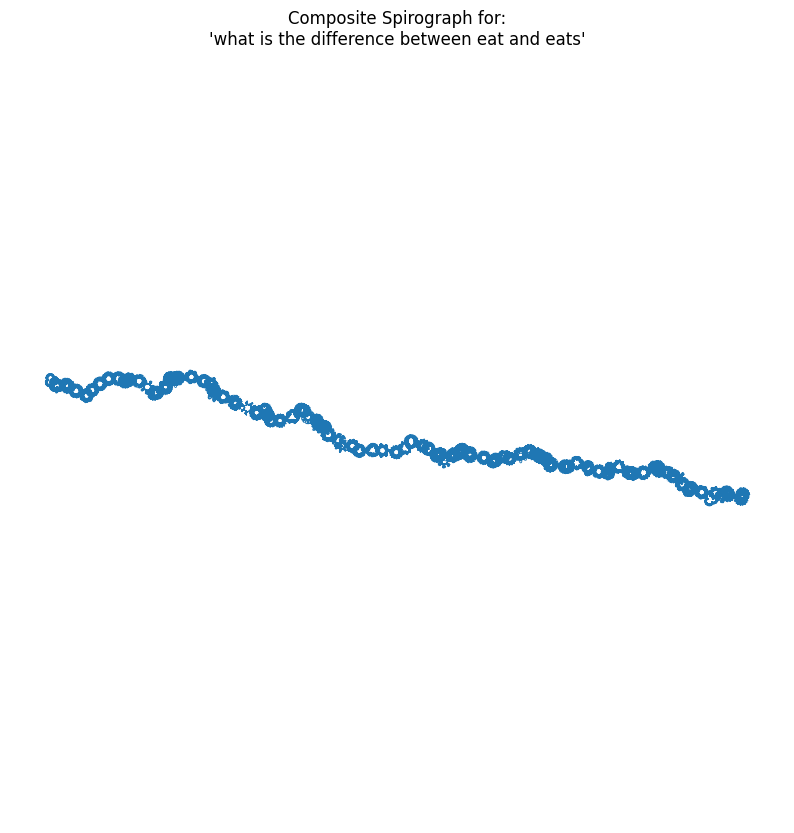

In [8]:

import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

# Load a sentence embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Function to generate a spirograph from parameters
def spirograph(R, r, d, num_points=100):
    theta = np.linspace(0, 2 * np.pi * r / np.gcd(int(R), int(r)), num_points)
    x = (R - r) * np.cos(theta) + d * np.cos(((R - r) / r) * theta)
    y = (R - r) * np.sin(theta) - d * np.sin(((R - r) / r) * theta)
    return x, y

# Function to normalize embeddings to spirograph parameter ranges
def normalize_triplet(triplet):
    eR, er, ed = np.tanh(triplet)  # compress to [-1, 1]
    R = 100 + 50 * eR   # Range: [50, 150]
    r = 15 + 10 * er    # Range: [5, 25]
    d = 40 + 30 * ed    # Range: [10, 70]
    return R, r, d

# Composite spirograph from full embedding
def composite_spirograph(embedding):
    x_total, y_total = [], []
    triplets = embedding[:384].reshape(-1, 3)
    for i, triplet in enumerate(triplets):
        R, r, d = normalize_triplet(triplet)
        x, y = spirograph(R, r, d, num_points=150)
        # Offset for continuity
        if x_total:
            x += x_total[-1] - x[0]
            y += y_total[-1] - y[0]
        x_total.extend(x)
        y_total.extend(y)
    return np.array(x_total), np.array(y_total)

# Input sentences
sentence = "what is the difference between eat and eats"
embedding = model.encode(sentence)

# Generate and plot
x, y = composite_spirograph(embedding)
plt.figure(figsize=(10, 10))
plt.plot(x, y, linewidth=0.6)
plt.title(f"Composite Spirograph for:\n'{sentence}'")
plt.axis('equal')
plt.axis('off')
plt.show()

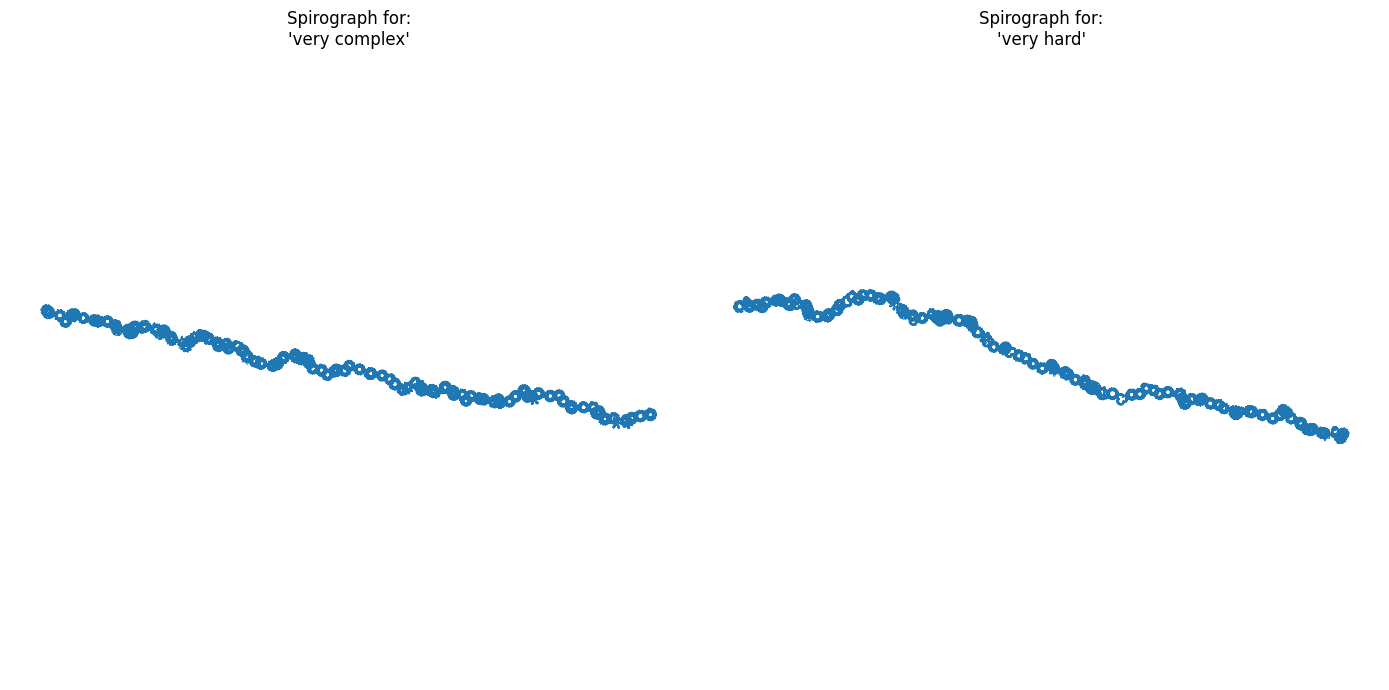

In [11]:

import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

# Load sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Spirograph generation function
def spirograph(R, r, d, num_points=100):
    theta = np.linspace(0, 2 * np.pi * r / np.gcd(int(R), int(r)), num_points)
    x = (R - r) * np.cos(theta) + d * np.cos(((R - r) / r) * theta)
    y = (R - r) * np.sin(theta) - d * np.sin(((R - r) / r) * theta)
    return x, y

# Normalize triplet of embedding into spirograph parameters
def normalize_triplet(triplet):
    eR, er, ed = np.tanh(triplet)
    R = 100 + 50 * eR
    r = 15 + 10 * er
    d = 40 + 30 * ed
    return R, r, d

# Composite spirograph generator from embedding
def composite_spirograph(embedding):
    x_total, y_total = [], []
    triplets = embedding[:384].reshape(-1, 3)
    for triplet in triplets:
        R, r, d = normalize_triplet(triplet)
        x, y = spirograph(R, r, d, num_points=150)
        if x_total:
            x += x_total[-1] - x[0]
            y += y_total[-1] - y[0]
        x_total.extend(x)
        y_total.extend(y)
    return np.array(x_total), np.array(y_total)

# Define two sentences
sentence1 = "very complex"
sentence2 = "very hard"

# Generate embeddings
embedding1 = model.encode(sentence1)
embedding2 = model.encode(sentence2)

# Generate spirograph paths
x1, y1 = composite_spirograph(embedding1)
x2, y2 = composite_spirograph(embedding2)

# Plot comparison
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(x1, y1, linewidth=0.6)
plt.title(f"Spirograph for:\n'{sentence1}'")
plt.axis('equal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(x2, y2, linewidth=0.6)
plt.title(f"Spirograph for:\n'{sentence2}'")
plt.axis('equal')
plt.axis('off')

plt.tight_layout()
plt.show()

In [12]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

sentences = ["This is an example sentence", "Each sentence is converted"]
embeddings = model.encode(sentences)

print(embeddings.shape)  # (2, 384)


(2, 384)


In [13]:
from sentence_transformers import SentenceTransformer

# Load the model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define your input sentences
sentences = ["This is an example sentence", "Each sentence is converted"]

# Encode the sentences to get the embeddings
embeddings = model.encode(sentences)

# Print each embedding vector
for i, emb in enumerate(embeddings):
    print(f"Sentence {i+1}: {sentences[i]}")
    print("Embedding vector:")
    print(emb)
    print("Vector length:", len(emb))
    print("="*60)


Sentence 1: This is an example sentence
Embedding vector:
[ 6.76569194e-02  6.34959713e-02  4.87131476e-02  7.93049783e-02
  3.74480933e-02  2.65277131e-03  3.93749513e-02 -7.09846430e-03
  5.93614057e-02  3.15369777e-02  6.00981042e-02 -5.29052615e-02
  4.06067781e-02 -2.59308387e-02  2.98428647e-02  1.12688600e-03
  7.35148042e-02 -5.03817983e-02 -1.22386612e-01  2.37028562e-02
  2.97265332e-02  4.24768738e-02  2.56337579e-02  1.99516211e-03
 -5.69190793e-02 -2.71598026e-02 -3.29035036e-02  6.60248846e-02
  1.19007230e-01 -4.58791181e-02 -7.26214051e-02 -3.25840116e-02
  5.23413308e-02  4.50553037e-02  8.25298298e-03  3.67024504e-02
 -1.39415674e-02  6.53918684e-02 -2.64271945e-02  2.06370896e-04
 -1.36643145e-02 -3.62810642e-02 -1.95043720e-02 -2.89738011e-02
  3.94270122e-02 -8.84091184e-02  2.62427772e-03  1.36713730e-02
  4.83062901e-02 -3.11566498e-02 -1.17329173e-01 -5.11690713e-02
 -8.85288343e-02 -2.18963325e-02  1.42986095e-02  4.44167666e-02
 -1.34815648e-02  7.43392259e-02

In [23]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')

# Similar sentences
sentence1 = "morning?"
sentence2 = "Good morning1?"

# Dissimilar sentence
sentence3 = " I am very tired today"
sentence4 = " I feel completely exhausted today."

# Get embeddings
emb1 = model.encode(sentence1, convert_to_tensor=True)
emb2 = model.encode(sentence2, convert_to_tensor=True)
emb3 = model.encode(sentence3, convert_to_tensor=True)
emb4 = model.encode(sentence4, convert_to_tensor=True)

# Compute cosine similarity
similarity_1_2 = util.cos_sim(emb1, emb2)
similarity_3_4 = util.cos_sim(emb3, emb4)

print("Similarity (Sentence 1 & 2):", similarity_1_2.item())
print("Similarity (Sentence 3 & 4):", similarity_3_4.item())


Similarity (Sentence 1 & 2): 0.7027630805969238
Similarity (Sentence 3 & 4): 0.7487066984176636


In [25]:
pip install sentence-transformers nltk matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 856.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [7]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 58.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


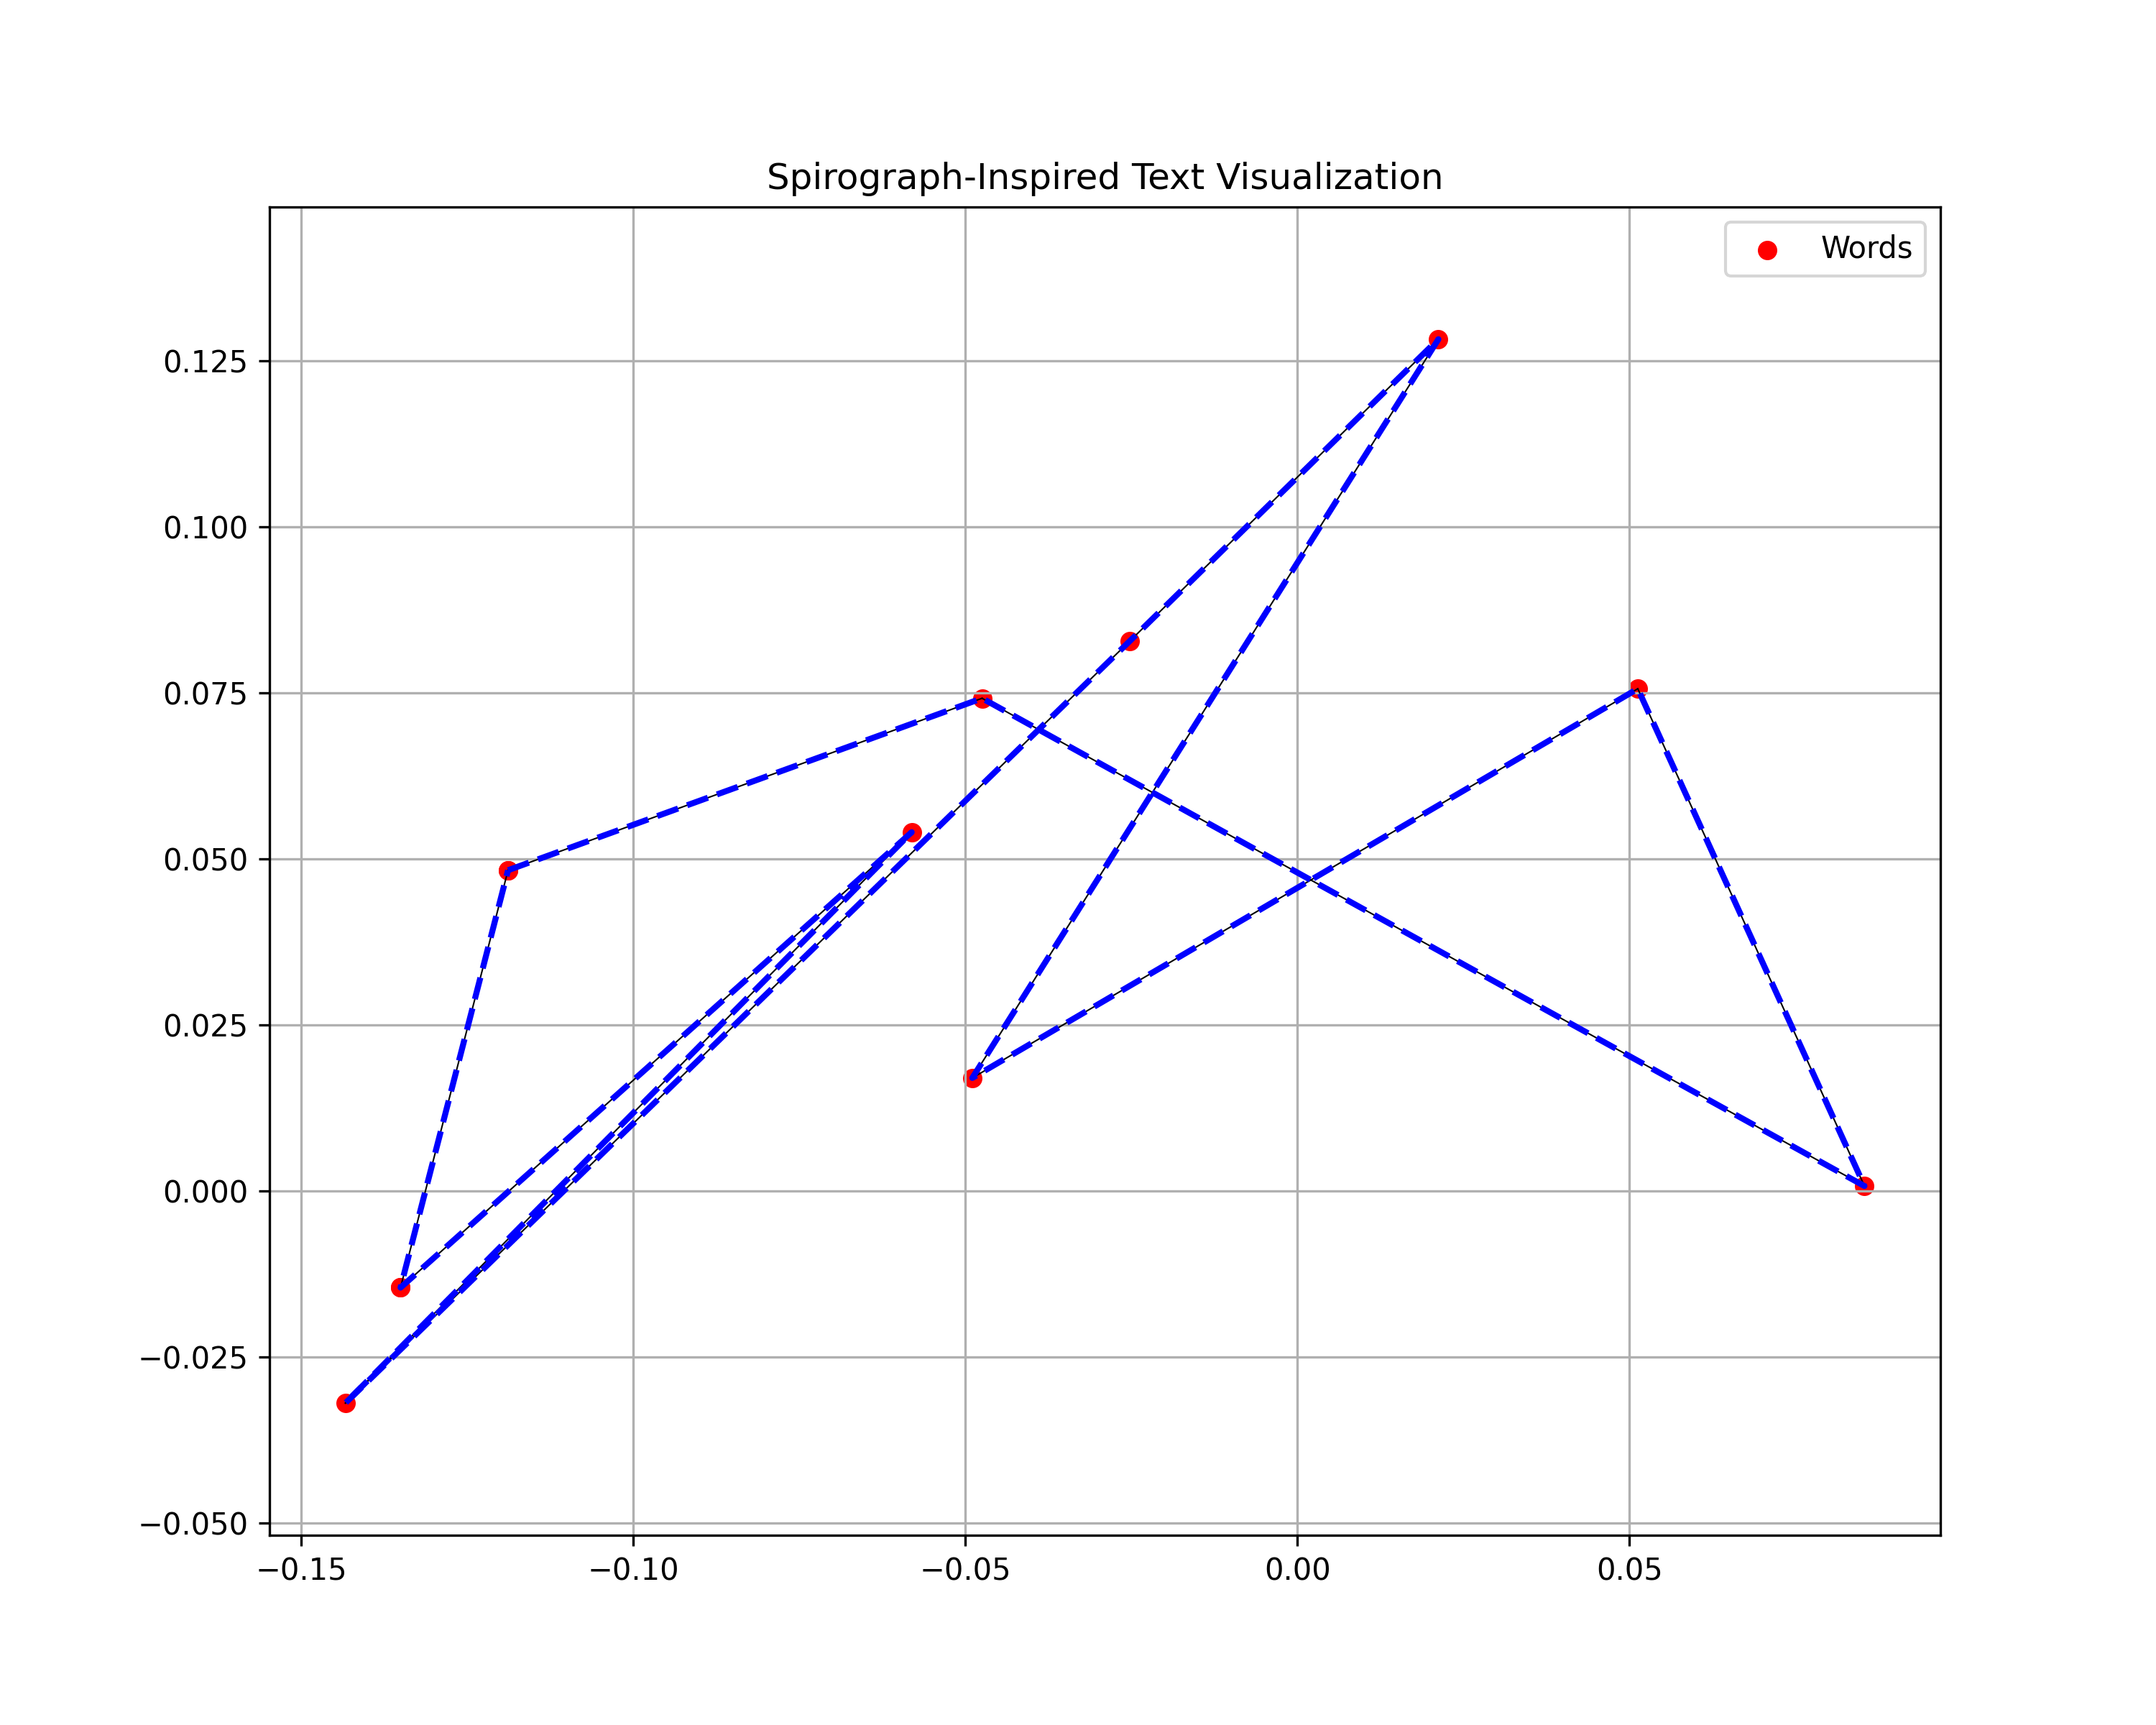

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import spacy
from sentence_transformers import SentenceTransformer
from IPython.display import Image, display

# Load spaCy tokenizer
nlp = spacy.load("en_core_web_sm")

# Load the pre-trained sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Sample input text
text = """
The capital city of Ethiopia is Addis Ababa!!
"""

# Use spaCy to tokenize text into sentences and words
doc = nlp(text)
sentences = [sent.text for sent in doc.sents]
words = [[token.text for token in sent] for sent in doc.sents]

# Flatten word list and encode each word into embeddings
flat_words = [word for sentence in words for word in sentence]
word_embeddings = model.encode(flat_words)

# Function to draw lines between word vectors
def build_lines_from_words(embeddings):
    lines = []
    for i in range(len(embeddings) - 1):
        start = embeddings[i][:2]
        end = embeddings[i + 1][:2]
        lines.append((start, end))
    return lines

# Function to create polygons for each sentence
def build_polygons_from_sentences(sentences_words, model):
    polygons = []
    for sentence in sentences_words:
        if len(sentence) >= 3:
            embeds = model.encode(sentence)
            polygon = np.array([e[:2] for e in embeds])
            polygons.append(polygon)
    return polygons

# Generate visuals
lines = build_lines_from_words(word_embeddings)
polygons = build_polygons_from_sentences(words, model)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot word points
word_coords = np.array([e[:2] for e in word_embeddings])
ax.scatter(word_coords[:, 0], word_coords[:, 1], color='red', s=30, label='Words')

# Plot lines between words
for start, end in lines:
    ax.plot([start[0], end[0]], [start[1], end[1]], color='black', linewidth=0.5)

# Plot sentence polygons
for poly in polygons:
    poly = np.vstack([poly, poly[0]])  # close polygon
    ax.plot(poly[:, 0], poly[:, 1], 'b--', linewidth=2)

# Final plot settings
ax.set_title("Spirograph-Inspired Text Visualization")
ax.axis('equal')
ax.grid(True)
plt.legend()

# Save and display the image (for Colab or Jupyter)
plt.savefig("spirograph_text_plot.png", dpi=300)
plt.close()
display(Image(filename="spirograph_text_plot.png"))


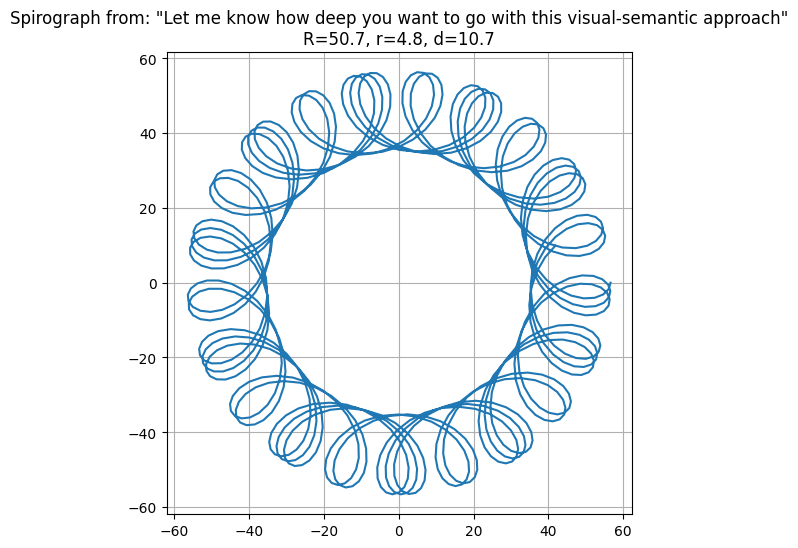

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

# Load model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Example sentence
text = "Let me know how deep you want to go with this visual-semantic approach"

# Encode to embedding
embedding = model.encode([text])[0]

# Map 3 values from embedding to R, r, d (scale to practical range)
def map_to_parameters(vec):
    R = 50 + (vec[0] * 20)   # scale around 50–70
    r = 5 + (vec[1] * 10)    # scale around 5–15
    d = 10 + (vec[2] * 30)   # scale around 10–40
    return abs(R), abs(r), abs(d)

R, r, d = map_to_parameters(embedding)

# Generate spirograph from R, r, d
t = np.linspace(0, 10 * np.pi, 1000)
x = (R - r) * np.cos(t) + d * np.cos((R - r) / r * t)
y = (R - r) * np.sin(t) - d * np.sin((R - r) / r * t)

# Plot
plt.figure(figsize=(6, 6))
plt.plot(x, y)
plt.title(f"Spirograph from: \"{text}\"\nR={R:.1f}, r={r:.1f}, d={d:.1f}")
plt.axis('equal')
plt.grid(True)
plt.show()
